In [2]:
function kdeCV(λ,i,observations)
    x,y = observations[i]
    newobservations = copy(observation)
    deleteat!(newobservations,i)
    kde(λ,x,y,newobservations)
end

# first line approximates ∫f̂², the second line approximates -(2/n)∫f̂f
J(λ) = sum([kde(λ,x,y,observations)^2 for x=xs,y=ys])*step(xs)*step(ys) -
        2/length(observations)*sum(kdeCV(λ,i,observations) for i=1:length(observations))
λ_best_cv = optimize(λ->J(first(λ)),[1.0],BFGS())

LoadError: UndefVarError: BFGS not defined

In [17]:

using LinearAlgebra, Statistics, Roots, Optim, Plots, Random
Random.seed!(1234)
n = 1000 # number of samples to draw

# the true regression function
r(x) = 2 + 1/50*x*(30-x)
# the true density function
σy = 3/2  
f(x,y) = 3/4000 * 1/√(2π*σy^2) * x*(20-x)*exp(-1/(2σy^2)*(y-r(x))^2)

# x values and y values for a grid
xs = 0:1/2^3:20
ys = 0:1/2^3:10

# F(t) is the CDF of X
F(t) = -t^3/4000 + 3t^2/400



LoadError: ArgumentError: Package Distribution not found in current path:
- Run `import Pkg; Pkg.add("Distribution")` to install the Distribution package.


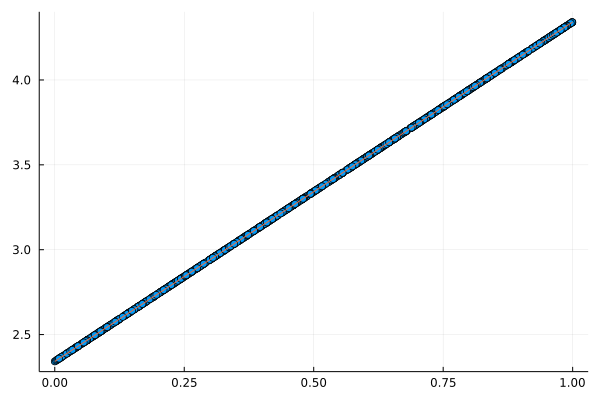

In [113]:
xs = 0:1/2^3:1
ys = 0:1/2^3:10
using Distributions, Plots
Random.seed!(11)
ϵ = rand(Normal(0,0.5),1)
x = rand(Uniform(),100)
y = 2 .+ϵ .+ 2 .*x 

xy = [(x[i],y[i]) for i=1:100]
xy
X = [ones(100) [X for (X,Y) in xy]]
β = (X'*X) \ X'*y
β
scatter(xy, label = "xy")
plot!(xs, 
      [β'*[1,x] for x in xs], 
      label = "empirical risk minimizer",
      linewidth = 1)


In [102]:
script = download("https://raw.githubusercontent.com/data-gymnasia/julia-binder/master/data-gymnasia/exam-studying.jl")
include(script)
y = [Y for (X,Y) in observations]
X = [ones(n) [X for (X,Y) in observations]]
β = (X'*X) \ X'*y # (computes (X'X)⁻¹X'y)
scatter(observations, label = "observations")
plot!(xs, 
      [β'*[1,x] for x in xs], 
      label = "empirical risk minimizer",
      linewidth = 3)
X 

1000×2 Matrix{Float64}:
 1.0  11.2173
 1.0  10.8855
 1.0  14.1604
 1.0   5.75235
 1.0   6.47899
 1.0  12.0123
 1.0   3.14543
 1.0  11.9818
 1.0   6.91582
 1.0   2.89097
 1.0  17.3072
 1.0  17.1748
 1.0  14.6084
 ⋮    
 1.0   3.89041
 1.0  14.037
 1.0   5.2986
 1.0   8.20395
 1.0  11.7107
 1.0   9.12355
 1.0  10.7147
 1.0   9.22785
 1.0  11.9512
 1.0   7.91145
 1.0   5.81376
 1.0   1.21285

In [86]:
observations = [(1,0), (2,1), (1,3), (3,2), (2,4), (1,3)]

6-element Vector{Tuple{Int64, Int64}}:
 (1, 0)
 (2, 1)
 (1, 3)
 (3, 2)
 (2, 4)
 (1, 3)

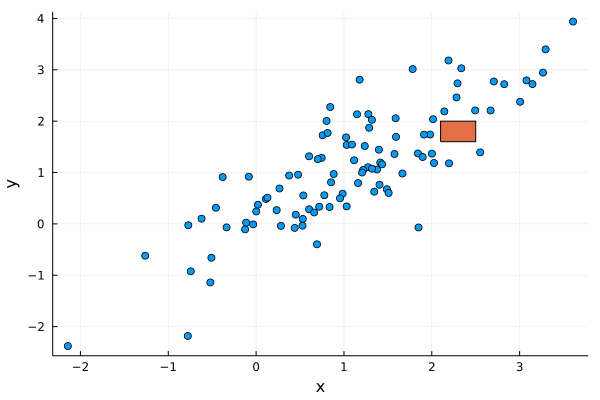

In [87]:
using Distributions
using Random; Random.seed!(123)
default(legend = false)
observations = Tuple.(eachcol(rand(MvNormal([1.0, 1], [1.0 0.8; 0.8 1]), 100)))
scatter(observations, xlabel = "x", ylabel = "y")
plot!([(2.1, 1.6), (2.5, 1.6), (2.5, 2), (2.1, 2)], seriestype = :shape)

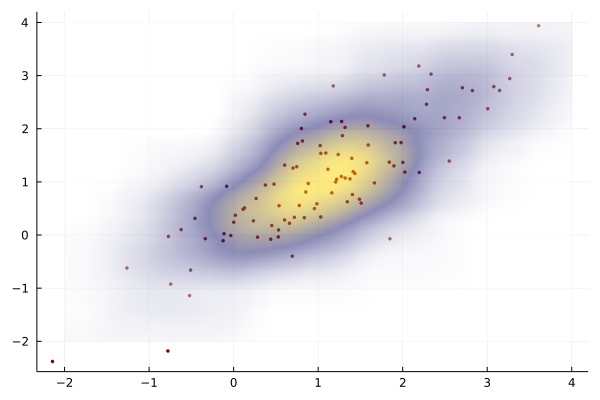

In [89]:
D(u) = abs(u) > 1 ? 0.0 : 70/81 * (1-abs(u)^3)
D(λ,u) = 1/λ * D(u/λ)
K(λ,x,y) = D(λ,x) * D(λ,y)
f̂(λ,x,y,observations) = sum(K(λ,x-Xi,y-Yi) for (Xi,Yi) in observations)/length(observations)

function densityestimate(observations, λ; res = 0.02)
  scatter(observations, markerstrokewidth=0, markersize=2, label = "",color = :DarkRed)
  heatmap!(-2:res:4, -2:res:4, (x,y) -> f̂(λ, x, y, observations),
       opacity = 0.5, color = cgrad([:white, :MidnightBlue, :Gold]))
end

figures = Dict()
for k in -5:5
  λ = 2.0^k
  figures[k] = densityestimate(observations, λ)
end
k = 0
figures[k]

In [68]:
script = download("https://raw.githubusercontent.com/data-gymnasia/julia-binder/master/data-gymnasia/exam-studying.jl")
include(script)
y = [Y for (X,Y) in observations]
X = [ones(n) [X for (X,Y) in observations]]
β = (X'*X) \ X'*y # (computes (X'X)⁻¹X'y)
scatter(observations, label = "observations")
plot!(xs, 
      [β'*[1,x] for x in xs], 
      label = "empirical risk minimizer",
      linewidth = 3)


1000-element Vector{Tuple{Float64, Float64}}:
 (11.217274195243439, 4.861203985935351)
 (10.885479827331368, 4.807043034176195)
 (14.16037946593837, 9.803716996537162)
 (5.752353192555613, 4.382017476443342)
 (6.478989941990802, 4.27237232078622)
 (12.012252442398667, 6.292529618106172)
 (3.145431798653493, 6.468558691780803)
 (11.981826048191005, 6.4829567094156975)
 (6.915822098605634, 5.747492405719758)
 (2.890973571485088, 1.3122853930439713)
 (17.307220228944335, 4.298431646052931)
 (17.17482897562219, 4.745307508247519)
 (14.608365667864616, 6.385910637361193)
 ⋮
 (3.890407353658969, 3.1831842160133084)
 (14.037035341646012, 6.341723996363055)
 (5.298599489953182, 3.056982006067448)
 (8.203953368581647, 3.506987833017155)
 (11.710690909961032, 9.216637680418305)
 (9.123551034795652, 4.393443546572071)
 (10.714674438900678, 5.061594400540879)
 (9.227845484448892, 5.823255199280032)
 (11.951249290202918, 6.370457747335941)
 (7.911452847330662, 4.064236375099413)
 (5.813761697371095

In [13]:
function sampleXY(r,σ)
    X = sampleX()
    Y = r(X) + σ*randn()
    (X,Y)
end

search:

Couldn't find randnormal
Perhaps you meant randperm


No documentation found.

Binding `randnormal` does not exist.


In [9]:
"Sample from the distribution of X (inverse CDF trick)"
function sampleX()
    U = rand()
    find_zero(t->F(t)-U,(0,20),Bisection())
end

"Sample from joint distribution of X and Y"
function sampleXY(r,σ)
    X = sampleX()
    Y = r(X) + σ*randn()
    (X,Y)
end

# Sample n observations
sample = [sampleXY(r,σy) for i=1:n]

1000-element Vector{Tuple{Float64, Float64}}:
 (15.626387969963977, 6.217250970181587)
 (10.811513230726213, 5.488313591318998)
 (7.669783500674181, 5.851214392134918)
 (1.6190739521503363, 3.584590530294074)
 (14.358358250128342, 7.665376663993232)
 (10.182280257366845, 5.847028894369122)
 (14.230854331905261, 4.807488062276966)
 (5.311402016573313, 4.366901826965528)
 (10.93691489011512, 5.4947388971949165)
 (11.898868880363567, 7.188093016478191)
 (4.5216306096525045, 3.890071402239576)
 (5.1375754760092, 2.8523362182358607)
 (12.349484490246127, 6.798223547585697)
 ⋮
 (3.041373411276273, 5.661420135864095)
 (15.278487562924917, 4.5225187880497)
 (7.80580137424938, 3.898894755676955)
 (3.8614554032773656, 0.2896694166447267)
 (9.499684197153417, 8.306480594355671)
 (9.754876619232629, 4.826126159279541)
 (5.308638647815812, 3.735017264867851)
 (9.217729688906479, 4.233881921247889)
 (12.669014280603358, 7.098013542142104)
 (11.431574441387076, 7.0444847428965485)
 (4.831419794970593

In [ ]:

D(u) = abs(u) < 1 ? 70/81*(1-abs(u)^3)^3 : 0 # tri-cube function
D(λ,u) = 1/λ*D(u/λ) # scaled tri-cube
K(λ,x,y) = D(λ,x) * D(λ,y) # kernel
kde(λ,x,y,observations) = sum(K(λ,x-Xi,y-Yi) for (Xi,Yi) in observations)/length(observations)
# `optimize` takes functions which accept vector arguments, so we treat
# λ as a one-entry vector
L(λ) = sum((f(x,y) - kde(λ,x,y,sample))^2 for x=xs,y=ys)*step(xs)*step(ys)

# minimize L using the BFGS method
λ_best = optimize(λ->L(first(λ)),[1.0],BFGS())
λ_best

In [40]:
xs = 0:1/2^3:20
ys = 0:1/2^3:10

function kdeCV(λ,i,observations)
    x,y = observations[i]
    newobservations = copy(observations)
    deleteat!(newobservations,i)
    kde(λ,x,y,newobservations)
end

# first line approximates ∫f̂², the second line approximates -(2/n)∫f̂f
J(λ) = sum([kde(λ,x,y,observations)^2 for x=xs,y=ys])*step(xs)*step(ys) -
        2/length(observations)*sum(kdeCV(λ,i,observations) for i=1:length(observations))
λ_best_cv = optimize(λ->J(first(λ)),[1.0],BFGS())

LoadError: InterruptException: